# Tutorial 12


### Today's Topic:
* GAN
* Decision Tree and Random Forest
* Q$A on final project



# Generative Adversarial Network (GAN)

The core idea of a GAN is based on the "indirect" training through the discriminator, another neural network that is able to tell how much an input is "realistic", which itself is also being updated dynamically. This basically means that the generator is not trained to minimize the distance to a specific image, but rather to fool the discriminator. This enables the model to learn in an unsupervised manner.
![](GAN.png)

In [1]:
import torch.nn.functional as F
from torch import nn

class Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super(Generator, self).__init__()       
        self.fc1 = nn.Linear(g_input_dim, 256)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features*2)
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features*2)
        self.fc4 = nn.Linear(self.fc3.out_features, g_output_dim)
    
    # forward method
    def forward(self, x): 
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.leaky_relu(self.fc3(x), 0.2)
        return torch.tanh(self.fc4(x))
    
class Discriminator(nn.Module):
    def __init__(self, d_input_dim):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(d_input_dim, 1024)
        self.fc2 = nn.Linear(self.fc1.out_features, self.fc1.out_features//2)
        self.fc3 = nn.Linear(self.fc2.out_features, self.fc2.out_features//2)
        self.fc4 = nn.Linear(self.fc3.out_features, 1)
    
    # forward method
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.dropout(x, 0.3)
        return torch.sigmoid(self.fc4(x))

/opt/anaconda3/envs/msse-python/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# build network
d_input_dim = ...
g_input_dim = ...
G = Generator(g_input_dim = g_input_dim, g_output_dim = d_input_dim)
D = Discriminator(d_input_dim)
# loss
criterion = nn.BCELoss() 

# optimizer
lr = 0.0002 
G_optimizer = Adam(G.parameters(), lr = lr)
D_optimizer = Adam(D.parameters(), lr = lr)

In [ ]:
def D_train(x):
    """ Train discriminator on one batch
    x: tensor shape(batchsize, model_input_dim)
    """
    #=======================Train the discriminator=======================#
    D.train()
    D.zero_grad()
    bs = len(x)
    # train discriminator on real
    x_real, y_real = x, torch.ones(bs, 1)

    D_output = D(x_real)
    D_real_loss = criterion(D_output, y_real)
    D_real_score = D_output
                              
    # train discriminator on fake
    z = torch.randn(bs,g_input_dim )
    x_fake, y_fake = G(z), np.zeros(bs, 1)
    D_output = D(x_fake)
    D_fake_loss = criterion(D_output, y_fake)
    D_fake_score = D_output

    # gradient backprop & optimize ONLY D's parameters
    D.zero_grad()
    D_loss = D_real_loss + D_fake_loss
    D_loss.backward()
    D_optimizer.step()

    return  D_loss.data.item()

def G_train(x):
    #=======================Train the generator=======================#
    G.zero_grad()
    bs = len(x)

    z = torch,randn(bs, g_input_dim)
    y = torch.ones(bs, 1)

    G_output = G(z)
    D_output = D(G_output)
    G_loss = criterion(D_output, y)

    # gradient backprop & optimize ONLY G's parameters
    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()

In [ ]:
n_epoch = 200
for epoch in range(1, n_epoch+1):           
    ...
    for batch_idx, (x, _) in enumerate(train_loader):
        D_train(x)
        G_train(x)


## Decision Tree and Random Forest

We'll use our old friend Iris dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
iris

/opt/anaconda3/envs/msse-python/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
from sklearn.model_selection import train_test_split
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Decision Tree

In [5]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([2, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2,
       0])

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


[Text(0.5416666666666666, 0.9285714285714286, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [37, 37, 31]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'X[3] <= 1.75\ngini = 0.496\nsamples = 68\nvalue = [0, 37, 31]'),
 Text(0.4166666666666667, 0.6428571428571429, 'X[2] <= 5.35\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.3333333333333333, 0.5, 'X[3] <= 1.65\ngini = 0.1\nsamples = 38\nvalue = [0, 36, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[2] <= 4.95\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.25, 0.21428571428571427, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0

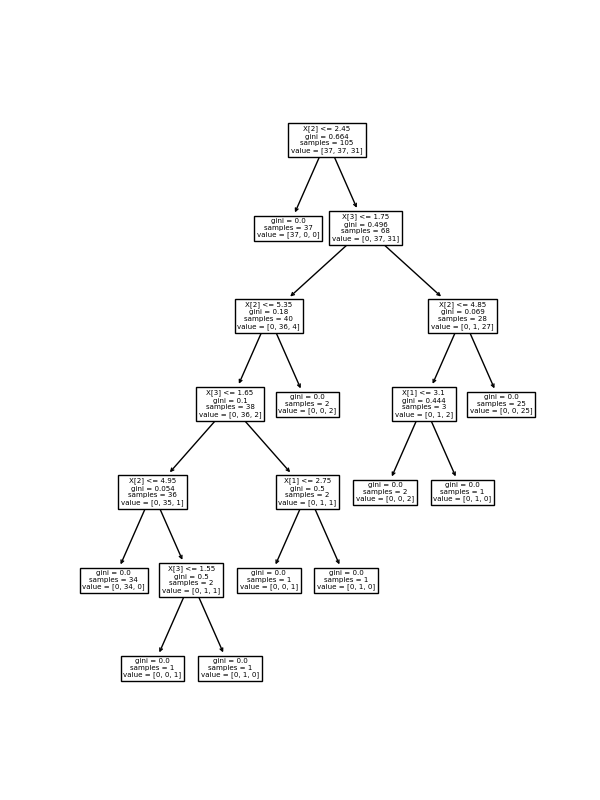

In [11]:
# %matplotlib widget
import matplotlib.pyplot as plt
plt.figure(figsize=(6,8))
tree.plot_tree(clf)

### Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

![](random-forest.png)

In [12]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=None, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#             oob_score=False, random_state=None, verbose=0,
#             warm_start=False)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred

array([2, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1,
       1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2,
       0])

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


### Finding Important Features 
* First, you need to create a random forests model.
* Second, use the feature importance variable to see feature importance scores.
* Third, visualize these scores using the seaborn library.

In [14]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
clf.feature_importances_

array([0.09429672, 0.02946509, 0.39905361, 0.47718457])